In [2]:
import numpy as np
import random
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.offsetbox import AnchoredText
from matplotlib.patheffects import withStroke
import matplotlib.ticker as ticker
import re
import os

In [9]:
predict_values = {}
temp = os.listdir("F:/文章/物候期/图表/图6. 分类热图/data/2023/")
folder_list = []
for i in temp:
    folder_list.append(i.split(".txt")[0])
for folder in folder_list:
    with open("F:/文章/物候期/图表/图6. 分类热图/data/2023/" + folder + ".txt","r") as f:
        predict_value = re.findall("[0-9]",f.read())
    f.close()
    for i in range(0,len(predict_value)):
        predict_value[i] = int(predict_value[i])
    predict_values.update({folder:predict_value})

In [10]:
b = np.ones(3669)
c = np.ones(2107)* 2
d = np.ones(2958) * 3
e = np.ones(5805) * 4
f = np.ones(1777) * 5
true_value = np.concatenate([b,c,d,e,f])

In [11]:
confusions = {}
for i in folder_list:
    confusions.update({i:confusion_matrix(np.array(true_value),np.array(predict_values[i])).astype("int")})

In [12]:
phenovit = np.array([[3599,   59,    0,    1,    0],
       [  85, 1880,   53,    1,    0],
       [   0,   79, 2720,  191,    0],
       [   0,   16,  114, 5677,   40],
       [   0,    0,    0,   83, 1718]])

In [14]:
label_size = 15

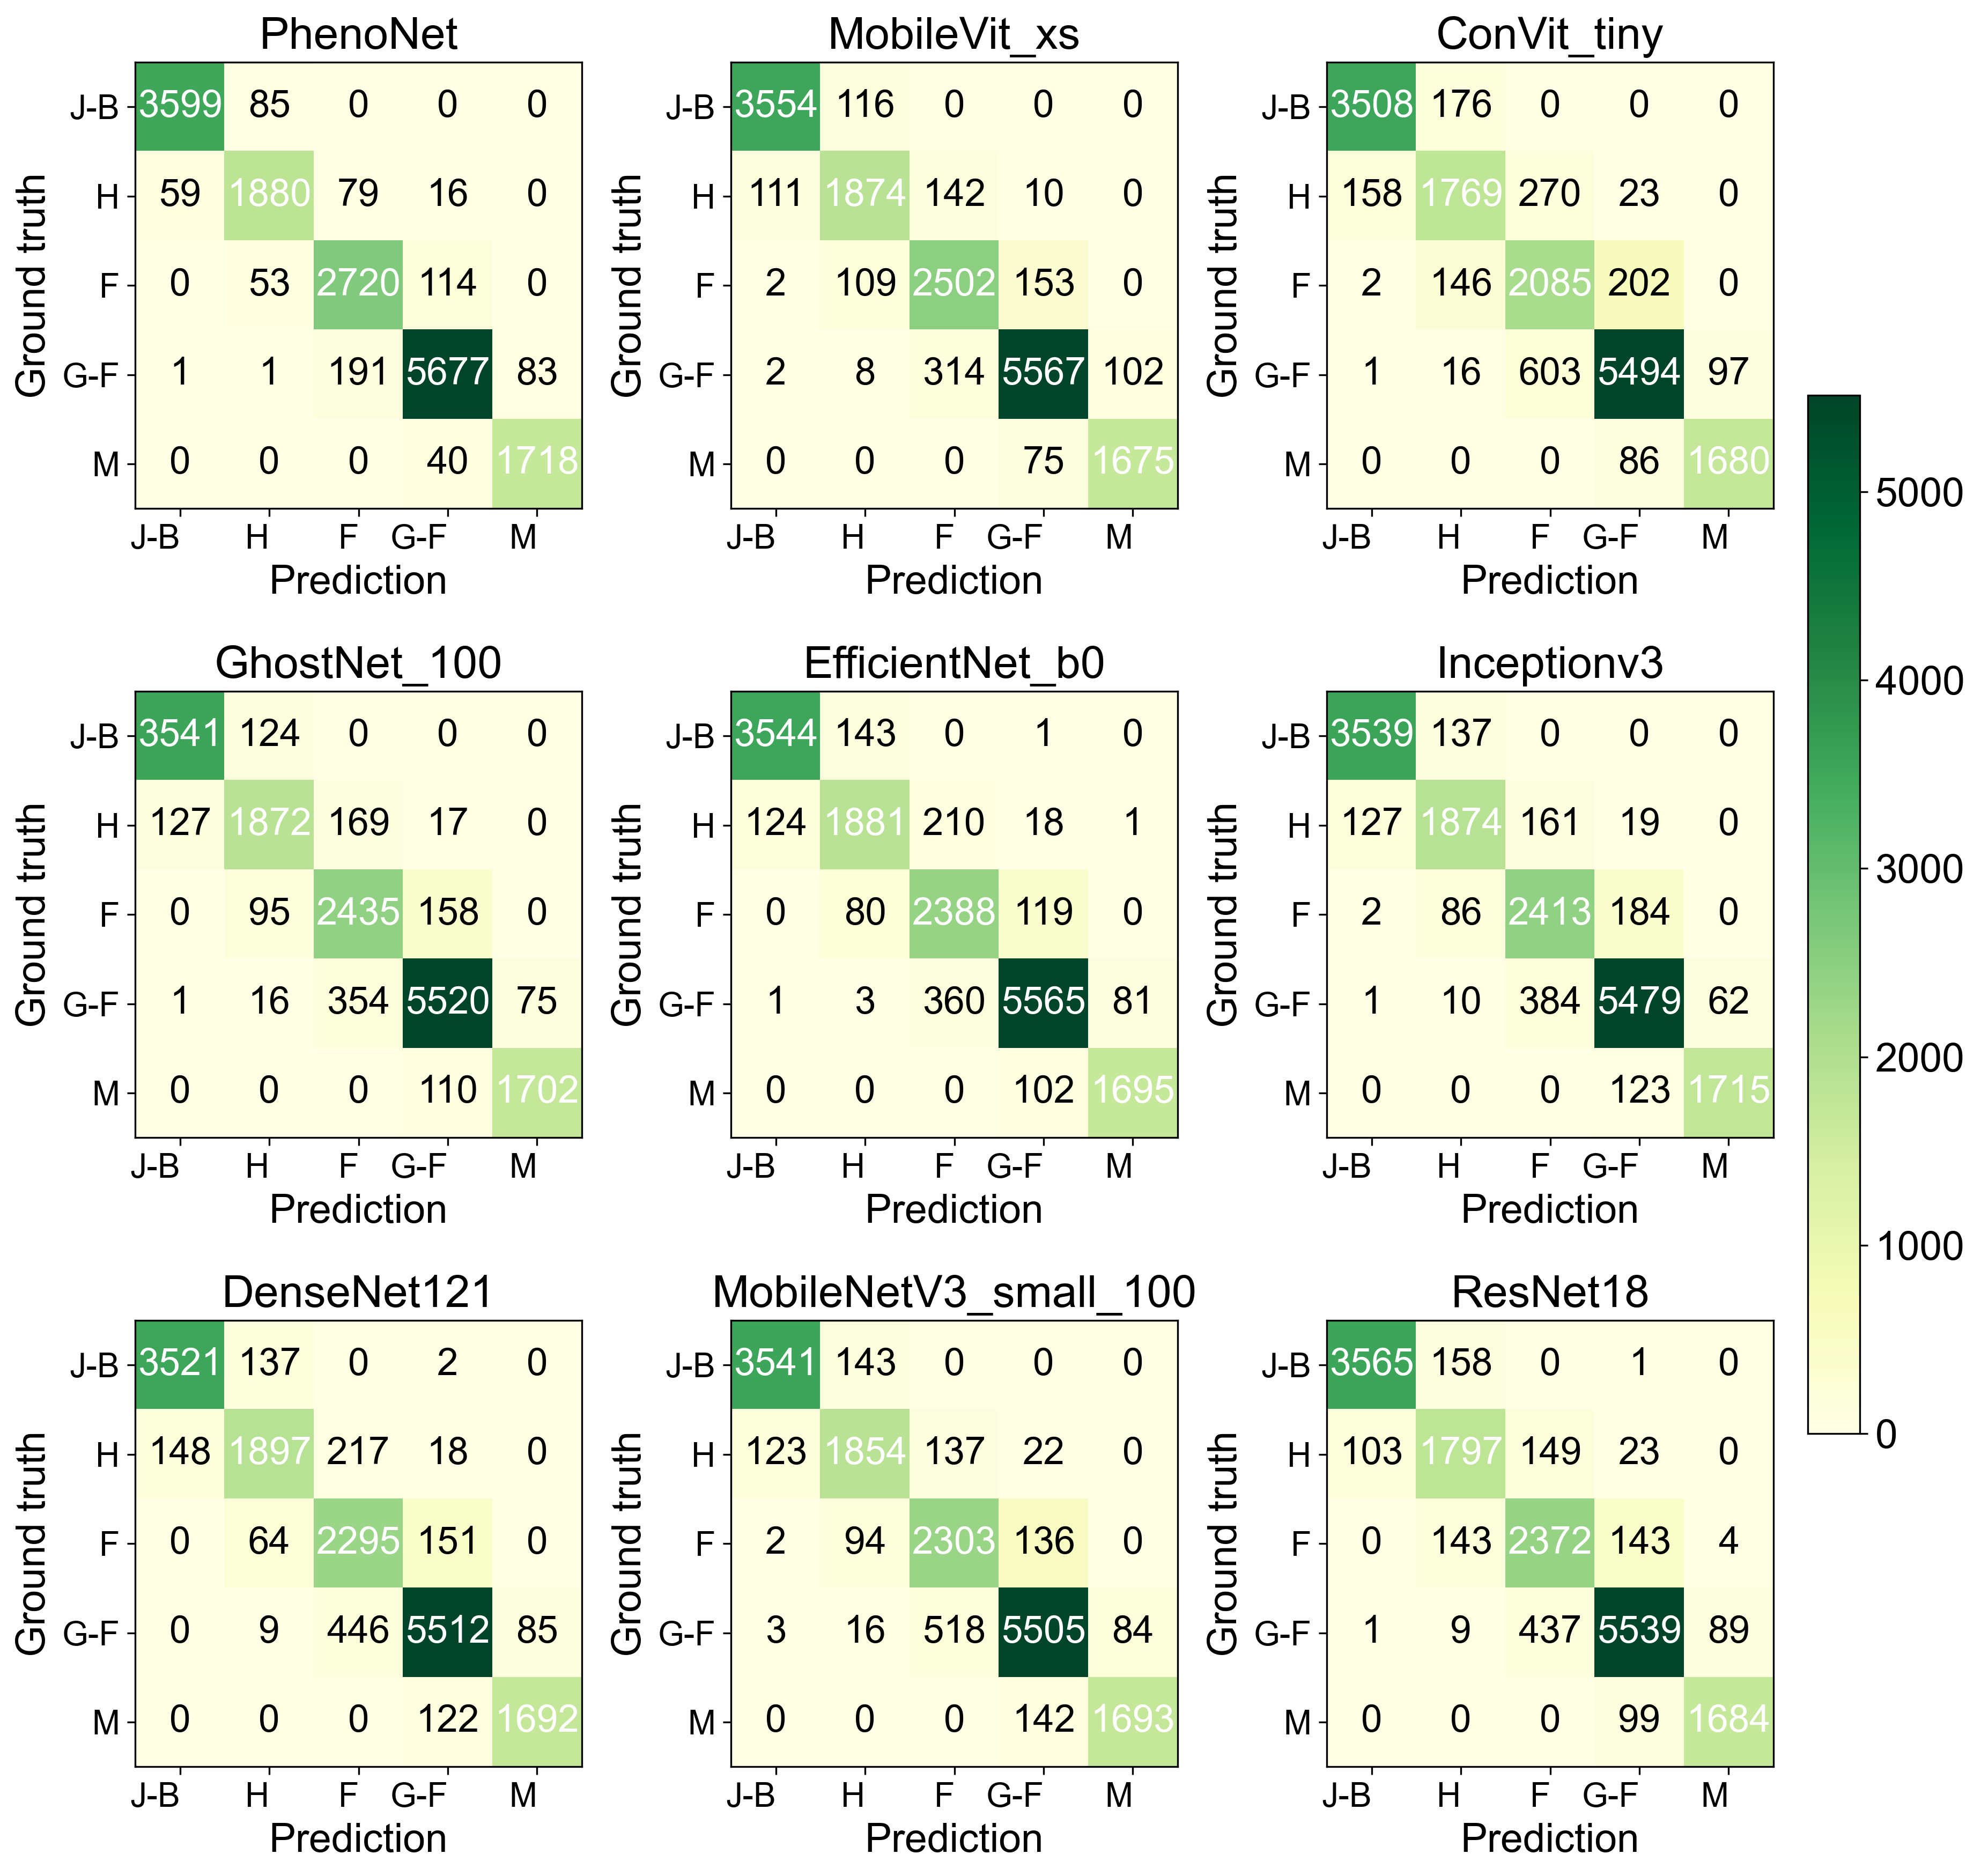

In [20]:
plt.rc('font',family='Arial', size=18)
x_label = ['J-B','H','F','G-F','M']
y_label = ['J-B','H','F','G-F','M']

fig = plt.figure(figsize=(12, 12), dpi=300)


ax0 = fig.add_subplot(3,3,1)
im0 = ax0.imshow(phenovit, cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax0.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax0.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax0.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(phenovit)):
    for second_index in range(len(phenovit[first_index])):
        if(phenovit[first_index][second_index]>1000):
            ax0.text(first_index, second_index, phenovit[first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax0.text(first_index, second_index, phenovit[first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax0.set_title("PhenoNet",fontsize=20)

ax5 = fig.add_subplot(3,3,2)
im4 = ax5.imshow(confusions['mobilevit_xs'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax5.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax5.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax5.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['mobilevit_xs'])):
    for second_index in range(len(confusions['mobilevit_xs'][first_index])):
        if(confusions['mobilevit_xs'][first_index][second_index]>1000):
            ax5.text(first_index, second_index, confusions['mobilevit_xs'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax5.text(first_index, second_index, confusions['mobilevit_xs'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax5.set_title("MobileVit_xs",fontsize=20)

ax7 = fig.add_subplot(3,3,3)
im6 = ax7.imshow(confusions['convit_tiny'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax7.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax7.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax7.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['convit_tiny'])):
    for second_index in range(len(confusions['convit_tiny'][first_index])):
        if(confusions['convit_tiny'][first_index][second_index]>1000):
            ax7.text(first_index, second_index, confusions['convit_tiny'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax7.text(first_index, second_index, confusions['convit_tiny'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax7.set_title("ConVit_tiny",fontsize=20)

ax2 = fig.add_subplot(3,3,4)
im2 = ax2.imshow(confusions['ghostnet_100'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax2.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['ghostnet_100'])):
    for second_index in range(len(confusions['ghostnet_100'][first_index])):
        if(confusions['ghostnet_100'][first_index][second_index]>1000):
            ax2.text(first_index, second_index, confusions['ghostnet_100'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax2.text(first_index, second_index, confusions['ghostnet_100'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax2.set_title("GhostNet_100",fontsize=20)



ax1 = fig.add_subplot(3,3,5)
im1 = ax1.imshow(confusions['efficientnet_b0'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax1.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['efficientnet_b0'])):
    for second_index in range(len(confusions['efficientnet_b0'][first_index])):
        if(confusions['efficientnet_b0'][first_index][second_index]>1000):
            ax1.text(first_index, second_index, confusions['efficientnet_b0'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax1.text(first_index, second_index, confusions['efficientnet_b0'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax1.set_title("EfficientNet_b0",fontsize=20)

ax3 = fig.add_subplot(3,3,6)
im3 = ax3.imshow(confusions['inception_v3'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax3.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax3.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax3.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['inception_v3'])):
    for second_index in range(len(confusions['inception_v3'][first_index])):
        if(confusions['inception_v3'][first_index][second_index]>1000):
            ax3.text(first_index, second_index, confusions['inception_v3'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax3.text(first_index, second_index, confusions['inception_v3'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax3.set_title("Inceptionv3",fontsize=20)

ax = fig.add_subplot(3,3,7)
im = ax.imshow(confusions['densenet121'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['densenet121'])):
    for second_index in range(len(confusions['densenet121'][first_index])):
        if(confusions['densenet121'][first_index][second_index]>1000):
            ax.text(first_index, second_index, confusions['densenet121'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax.text(first_index, second_index, confusions['densenet121'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax.set_title("DenseNet121",fontsize=20)

ax4 = fig.add_subplot(3,3,8)
im4 = ax4.imshow(confusions['mobilenet_v3'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax4.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax4.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax4.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['mobilenet_v3'])):
    for second_index in range(len(confusions['mobilenet_v3'][first_index])):
        if(confusions['mobilenet_v3'][first_index][second_index]>1000):
            ax4.text(first_index, second_index, confusions['mobilenet_v3'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax4.text(first_index, second_index, confusions['mobilenet_v3'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax4.set_title("MobileNetV3_small_100",fontsize=20)

ax6 = fig.add_subplot(3,3,9)
im5 = ax6.imshow(confusions['resnet18'], cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax6.set_xticks(np.arange(len(y_label)), labels=y_label,fontsize=label_size)
ax6.set_yticks(np.arange(len(x_label)), labels=x_label,fontsize=label_size)
# Rotate the tick labels and set their alignment.
plt.setp(ax6.get_xticklabels(), ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for first_index in range(len(confusions['resnet18'])):
    for second_index in range(len(confusions['resnet18'][first_index])):
        if(confusions['resnet18'][first_index][second_index]>1000):
            ax6.text(first_index, second_index, confusions['resnet18'][first_index][second_index],va = 'center',ha = 'center',color="white",fontsize=17)
        else:
            ax6.text(first_index, second_index, confusions['resnet18'][first_index][second_index],va = 'center',ha = 'center',family='Arial',fontsize=17)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Ground truth',fontsize=18)
ax6.set_title("ResNet18",fontsize=20)



fig.tight_layout()
fig.colorbar(im, ax=[ax0, ax1, ax2, ax3,ax4, ax5, ax6, ax7, ax], fraction=0.03, pad=0.02)
#fig.savefig("D:/UserData/Desktop/heatmap.png",dpi=300,bbox_inches = 'tight')


In [21]:
fig.savefig("D:/UserData/Desktop/heatmap.png",dpi=300,bbox_inches = 'tight')